In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [2]:
df = pd.read_csv("data/brickset_features.csv")

df["year"] = df["year"].astype(int)

df

,set_no,name,price_store,price_used,popularity,group,year,total_parts,number_parts,number_colors,scolor_1st,scolor_2nd
0,1591-1,Danone Delivery Truck,NaN,28.0,NaN,Modern day,1980,40,19,4,White,Blue
1,1592-1,Town Square - Castle Scene,NaN,235.0,19.2,Modern day,1980,495,133,10,Black,Yellow
2,1651-2,Maersk Line Container Lorry,NaN,444.0,5.0,Modern day,1980,305,66,9,Blue,Gray
3,6305-1,Trees and Flowers,3.75,10.0,17.2,Modern day,1980,24,6,4,Green,Red
4,6306-1,Road Signs,2.50,13.0,12.0,Modern day,1980,12,10,1,White,White
...,...,...,...,...,...,...,...,...,...,...,...,...
3208,76079-1,Ravager Attack,19.99,15.0,8.0,Licensed,2017,196,106,23,Black,Gray
3209,76080-1,Ayesha's Revenge,29.99,26.0,14.1,Licensed,2017,304,140,22,Black,Gray
3210,76081-1,The Milano vs. The Abilisk,49.99,48.0,4.0,Licensed,2017,456,176,27,Gray,Gray
3211,76082-1,ATM Heist Battle,19.99,12.0,4.0,Licensed,2017,184,111,20,Blue,Gray


In [3]:
## one-hot encoding

df = pd.get_dummies(df, columns=["group", "scolor_1st", "scolor_2nd"], drop_first=True)
df

,set_no,name,price_store,price_used,popularity,year,total_parts,number_parts,number_colors,group_Historical,...,scolor_1st_Yellow,scolor_2nd_Blue,scolor_2nd_Brown,scolor_2nd_Gray,scolor_2nd_Green,scolor_2nd_Red,scolor_2nd_Tan,scolor_2nd_Transparent,scolor_2nd_White,scolor_2nd_Yellow
0,1591-1,Danone Delivery Truck,NaN,28.0,NaN,1980,40,19,4,0,...,0,1,0,0,0,0,0,0,0,0
1,1592-1,Town Square - Castle Scene,NaN,235.0,19.2,1980,495,133,10,0,...,0,0,0,0,0,0,0,0,0,1
2,1651-2,Maersk Line Container Lorry,NaN,444.0,5.0,1980,305,66,9,0,...,0,0,0,1,0,0,0,0,0,0
3,6305-1,Trees and Flowers,3.75,10.0,17.2,1980,24,6,4,0,...,0,0,0,0,0,1,0,0,0,0
4,6306-1,Road Signs,2.50,13.0,12.0,1980,12,10,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3208,76079-1,Ravager Attack,19.99,15.0,8.0,2017,196,106,23,0,...,0,0,0,1,0,0,0,0,0,0
3209,76080-1,Ayesha's Revenge,29.99,26.0,14.1,2017,304,140,22,0,...,0,0,0,1,0,0,0,0,0,0
3210,76081-1,The Milano vs. The Abilisk,49.99,48.0,4.0,2017,456,176,27,0,...,0,0,0,1,0,0,0,0,0,0
3211,76082-1,ATM Heist Battle,19.99,12.0,4.0,2017,184,111,20,0,...,0,0,0,1,0,0,0,0,0,0


In [4]:
## remove NaN's

nafilter = df["price_store"].isna()
print(nafilter.sum()) ## is 451 OUCH!!!

df = df[~nafilter]
df

451


,set_no,name,price_store,price_used,popularity,year,total_parts,number_parts,number_colors,group_Historical,...,scolor_1st_Yellow,scolor_2nd_Blue,scolor_2nd_Brown,scolor_2nd_Gray,scolor_2nd_Green,scolor_2nd_Red,scolor_2nd_Tan,scolor_2nd_Transparent,scolor_2nd_White,scolor_2nd_Yellow
3,6305-1,Trees and Flowers,3.75,10.0,17.2,1980,24,6,4,0,...,0,0,0,0,0,1,0,0,0,0
4,6306-1,Road Signs,2.50,13.0,12.0,1980,12,10,1,0,...,0,0,0,0,0,0,0,0,1,0
7,6375-2,Exxon Gas Station,20.00,73.0,24.0,1980,272,95,12,0,...,0,0,0,0,0,1,0,0,0,0
8,6390-1,Main Street,40.00,250.0,23.0,1980,614,156,11,0,...,0,0,0,0,0,0,0,0,1,0
17,6077-1,Knight's Procession,5.00,43.0,4.0,1981,49,21,6,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3208,76079-1,Ravager Attack,19.99,15.0,8.0,2017,196,106,23,0,...,0,0,0,1,0,0,0,0,0,0
3209,76080-1,Ayesha's Revenge,29.99,26.0,14.1,2017,304,140,22,0,...,0,0,0,1,0,0,0,0,0,0
3210,76081-1,The Milano vs. The Abilisk,49.99,48.0,4.0,2017,456,176,27,0,...,0,0,0,1,0,0,0,0,0,0
3211,76082-1,ATM Heist Battle,19.99,12.0,4.0,2017,184,111,20,0,...,0,0,0,1,0,0,0,0,0,0


In [5]:
x = df.loc[:,"year":]
y = df["price_store"]

x.shape, y.shape

((2762, 27), (2762,))

In [6]:
x = np.array(x)
y = np.array(y)

x.shape,y.shape

((2762, 27), (2762,))

In [7]:
x, y

(array([[1980,   24,    6, ...,    0,    0,    0],
        [1980,   12,   10, ...,    0,    1,    0],
        [1980,  272,   95, ...,    0,    0,    0],
        ...,
        [2017,  456,  176, ...,    0,    0,    0],
        [2017,  184,  111, ...,    0,    0,    0],
        [2017,  374,  148, ...,    0,    0,    0]]),
 array([ 3.75,  2.5 , 20.  , ..., 49.99, 19.99, 39.99]))

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2209, 27), (553, 27), (2209,), (553,))

In [9]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_norm = scaler.transform(x_train)
x_test_norm  = scaler.transform(x_test)

x_train, x_train_norm

(array([[2016,   82,   46, ...,    0,    0,    0],
        [2016,  173,  143, ...,    0,    0,    0],
        [2008,  499,  145, ...,    0,    0,    0],
        ...,
        [2016,  577,  168, ...,    0,    0,    0],
        [2002,  136,   68, ...,    0,    0,    0],
        [2008,  234,   95, ...,    0,    1,    0]]),
 array([[ 1.16441081, -0.61395146, -0.84859697, ..., -0.09796839,
         -0.34585373, -0.25713749],
        [ 1.16441081, -0.42078784,  0.28940704, ..., -0.09796839,
         -0.34585373, -0.25713749],
        [ 0.19322581,  0.27120492,  0.31287104, ..., -0.09796839,
         -0.34585373, -0.25713749],
        ...,
        [ 1.16441081,  0.43677374,  0.58270704, ..., -0.09796839,
         -0.34585373, -0.25713749],
        [-0.53516295, -0.49932689, -0.59049297, ..., -0.09796839,
         -0.34585373, -0.25713749],
        [ 0.19322581, -0.29130453, -0.27372897, ..., -0.09796839,
          2.89139577, -0.25713749]]))

In [10]:
scaler = StandardScaler()

## we need reshaping for targets
y_train_shape = y_train.shape
y_test_shape  = y_test.shape

scaler.fit(y_train.reshape(-1, 1))

y_train_norm = scaler.transform(y_train.reshape(-1, 1)).reshape(y_train_shape)
y_test_norm  = scaler.transform(y_test.reshape(-1, 1)).reshape(y_test_shape)

y_train, y_train_norm

(array([24.99, 39.99, 49.99, ..., 49.99, 70.  , 19.99]),
 array([-0.33117258,  0.00883844,  0.23551246, ...,  0.23551246,
         0.68908716, -0.44450959]))

In [11]:
## baseline SVR accuracy

reg = SVR()

reg.fit(x_train_norm, y_train_norm)
reg.score(x_train_norm, y_train_norm), reg

(0.850791733406053,
 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
     gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
     tol=0.001, verbose=False))

In [12]:
## optimize hyperparameters

svr = GridSearchCV(
    SVR(kernel='rbf', gamma=0.1, epsilon=0.1),
    cv=5,
    n_jobs=10,
    iid=False,
    param_grid={
        "C": np.logspace(-1,3,10),
        "gamma": np.logspace(-4, 0, 10),
        "epsilon": np.linspace(0.05,1.5,10)
    }
)

svr.fit(x_train_norm, y_train_norm)
svr.score(x_train_norm, y_train_norm), svr.best_estimator_

(0.8966840998532344,
 SVR(C=16.68100537200059, cache_size=200, coef0=0.0, degree=3, epsilon=0.05,
     gamma=0.002154434690031882, kernel='rbf', max_iter=-1, shrinking=True,
     tol=0.001, verbose=False))

In [35]:
score = pd.DataFrame(svr.cv_results_)[["param_C", "param_gamma", "param_epsilon", "mean_test_score", "std_test_score"]]
score.head()

,param_C,param_gamma,param_epsilon,mean_test_score,std_test_score
0,0.1,0.0001,0.05,0.003664,0.009458
1,0.1,0.000278256,0.05,0.136382,0.007693
2,0.1,0.000774264,0.05,0.383769,0.016689
3,0.1,0.00215443,0.05,0.618522,0.022757
4,0.1,0.00599484,0.05,0.710624,0.025643


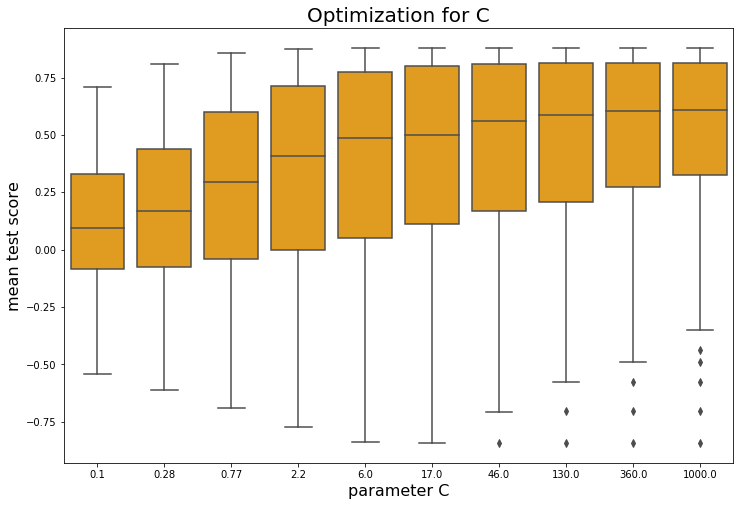

In [31]:
f, ax = plt.subplots(figsize=(12, 8))

filter = score["mean_test_score"] > -5
score["param_C"] = score["param_C"].apply(lambda num: float(f'{num:.2}'))

ax = sns.boxplot(data=score[filter], y="mean_test_score", x="param_C", ax=ax, color="orange");

ax.set_title("Optimization for C", fontsize=20);
ax.set_xlabel("parameter C",fontsize=16)
ax.set_ylabel("mean test score",fontsize=16)

plt.savefig('500-svm-rbf-param-c.png', dpi=300, bbox_inches='tight')

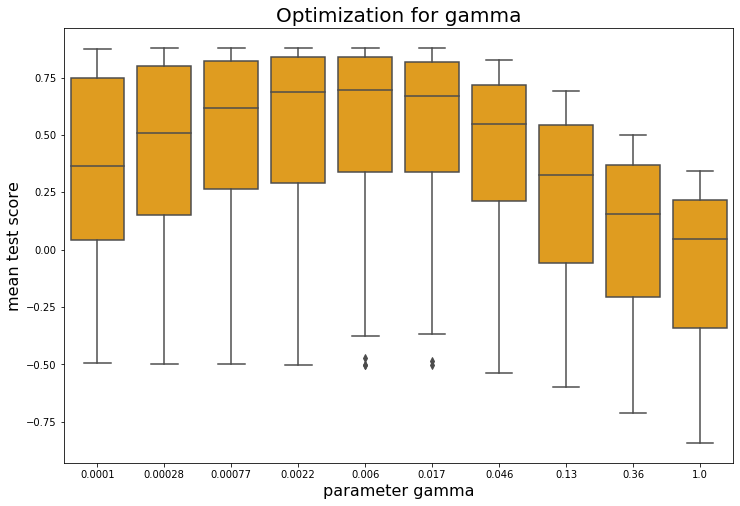

In [36]:
f, ax = plt.subplots(figsize=(12, 8))

filter = score["mean_test_score"] > -5
score["param_gamma"] = score["param_gamma"].apply(lambda num: f'{num:.2}')

ax = sns.boxplot(data=score[filter], y="mean_test_score", x="param_gamma", ax=ax, color="orange");

ax.set_title("Optimization for gamma", fontsize=20);
ax.set_xlabel("parameter gamma",fontsize=16)
ax.set_ylabel("mean test score",fontsize=16)

plt.savefig('500-svm-rbf-param-gamma.png', dpi=300, bbox_inches='tight')

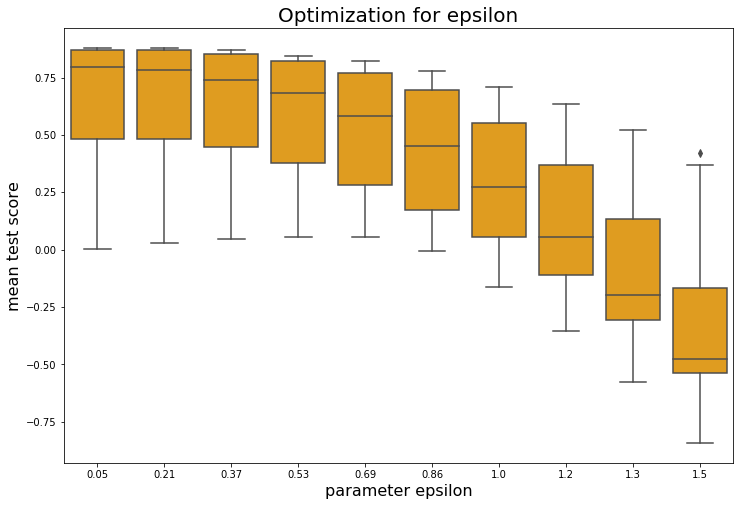

In [28]:
f, ax = plt.subplots(figsize=(12, 8))

filter = score["mean_test_score"] > -5
score["param_epsilon"] = score["param_epsilon"].apply(lambda num: float(f'{num:.2}'))

ax = sns.boxplot(data=score[filter], y="mean_test_score", x="param_epsilon", ax=ax, color="orange");

ax.set_title("Optimization for epsilon", fontsize=20);
ax.set_xlabel("parameter epsilon",fontsize=16)
ax.set_ylabel("mean test score",fontsize=16)

plt.savefig('500-svm-rbf-param-epsilon.png', dpi=300, bbox_inches='tight')

In [37]:
svr.score(x_test_norm, y_test_norm)

0.895990366898356

In [38]:
## baseline SVR accuracy

reg = SVR(kernel="linear")

reg.fit(x_train_norm, y_train_norm)
reg.score(x_train_norm, y_train_norm), reg

(0.87432471664132, SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
     gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
     tol=0.001, verbose=False))

In [39]:
## optimize hyperparameters

svr = GridSearchCV(
    SVR(kernel='linear', C=1, epsilon=0.1),
    cv=5,
    n_jobs=10,
    iid=False,
    param_grid={
        "C": np.logspace(-1, 3, 5),
        "epsilon": np.linspace(0, 0.5, 5)
    }
)

svr.fit(x_train_norm, y_train_norm)
svr.score(x_train_norm, y_train_norm), svr.best_estimator_

(0.874973123486118,
 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.125,
     gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
     tol=0.001, verbose=False))

In [40]:
score = pd.DataFrame(svr.cv_results_)[["param_C", "param_epsilon", "mean_test_score"]]
score.head()

,param_C,param_epsilon,mean_test_score
0,0.1,0,0.868140
1,0.1,0.125,0.870151
2,0.1,0.25,0.869633
3,0.1,0.375,0.856203
4,0.1,0.5,0.837642


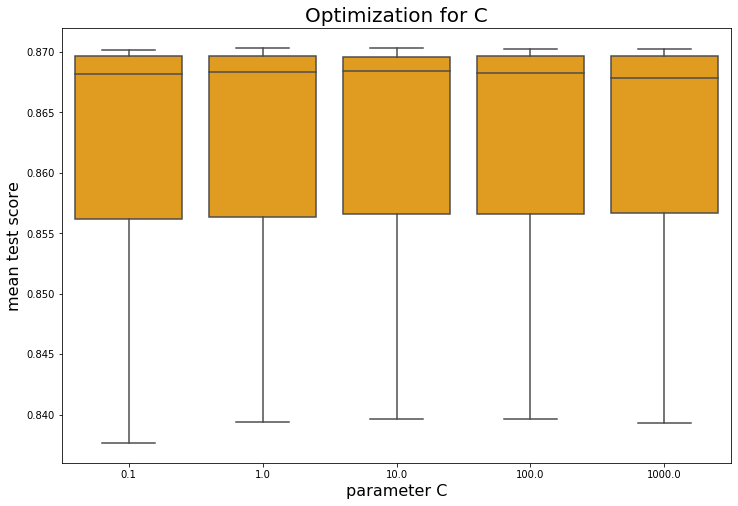

In [41]:
f, ax = plt.subplots(figsize=(12, 8))

filter = score["mean_test_score"] > -5
score["param_C"] = score["param_C"].apply(lambda num: float(f'{num:.2}'))

ax = sns.boxplot(data=score[filter], y="mean_test_score", x="param_C", ax=ax, color="orange");

ax.set_title("Optimization for C", fontsize=20);
ax.set_xlabel("parameter C",fontsize=16)
ax.set_ylabel("mean test score",fontsize=16)

plt.savefig('500-svm-lin-param-c.png', dpi=300, bbox_inches='tight')

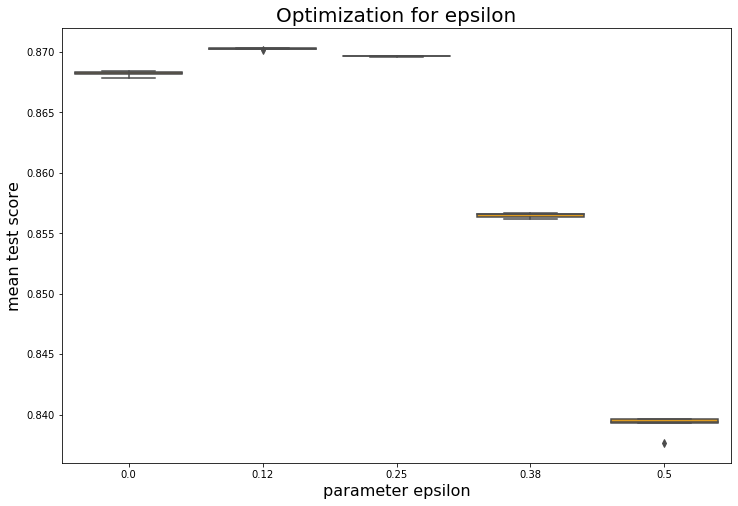

In [42]:
f, ax = plt.subplots(figsize=(12, 8))

filter = score["mean_test_score"] > -5
score["param_epsilon"] = score["param_epsilon"].apply(lambda num: float(f'{num:.2}'))

ax = sns.boxplot(data=score[filter], y="mean_test_score", x="param_epsilon", ax=ax, color="orange");

ax.set_title("Optimization for epsilon", fontsize=20);
ax.set_xlabel("parameter epsilon",fontsize=16)
ax.set_ylabel("mean test score",fontsize=16)

plt.savefig('500-svm-lin-param-epsilon.png', dpi=300, bbox_inches='tight')

In [43]:
svr.score(x_test_norm, y_test_norm)

0.8666729618564667